In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [19]:
# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only allocate a specific amount of memory on the first GPU
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8192)])  # Limit memory to 8GB
    except RuntimeError as e:
        print(e)

In [20]:
# Set parameters
image_size = (800, 800)  # Updated input size
batch_size = 32
epochs = 40  # Increased epochs for more training
num_classes = 10  # Adjust based on your dataset

In [21]:
# Define class labels based on shape and other features
class_labels = ['apple', 'cucumber', 'garlic', 'ginger', 'green_chili', 
                'guava', 'lemon', 'onion', 'potato', 'tomato']


In [22]:
# Prepare the data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [23]:
# Data generator for validation/testing data (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\navon\OneDrive\Documents\ai workd\resized_data\train",  # Path to your training dataset directory
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 99 images belonging to 10 classes.


In [25]:
# Validation data generator
validation_generator = validation_datagen.flow_from_directory(
    r"C:\Users\navon\OneDrive\Documents\ai workd\resized_data\validation",  # Path to your validation dataset directory
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling for validation data
)

Found 99 images belonging to 10 classes.


In [26]:
# Display the class labels mapped to their corresponding indices
print("Class indices:", train_generator.class_indices)

Class indices: {'Garlic': 0, 'Ginger': 1, 'Guava': 2, 'Lemon': 3, 'Tomato': 4, 'apple': 5, 'cucumber': 6, 'green_chili': 7, 'onion': 8, 'potato': 9}


In [27]:
# Build the CNN model with additional layers for texture and color analysis
model = Sequential()

# Convolutional Block 1
model.add(Input(shape=(800, 800, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 4 for texture detection
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 5 for color and shape detection
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers for classification and quality analysis
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification


In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
#Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 21s/step - accuracy: 0.1302 - loss: 2.3468 - val_accuracy: 0.0833 - val_loss: 2.2849
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.6667 - loss: 2.2171 - val_accuracy: 1.0000 - val_loss: 1.8562
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 11s/step - accuracy: 0.1196 - loss: 2.2918 - val_accuracy: 0.1562 - val_loss: 2.2799
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 450ms/step - accuracy: 0.1562 - loss: 2.2772 - val_accuracy: 1.0000 - val_loss: 2.0846
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 14s/step - accuracy: 0.1276 - loss: 2.2581 - val_accuracy: 0.1250 - val_loss: 2.2354
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.3333 - loss: 2.1538 - val_accuracy: 1.0000 - val_loss: 1.1536
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 15s/step - accuracy: 0.0662 - loss: 2.3360 - val_accuracy: 0.1354 - val_loss: 2.2640
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.1250 - loss: 2.2679 - val_accuracy: 0.6667 - val_loss: 2

In [30]:
# Save the model
model.save('fruit_quality_model_texture_color_shape.keras')  # Save the model with the custom architecture

In [31]:
# Plot training and validation accuracy and loss using matplotlib
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

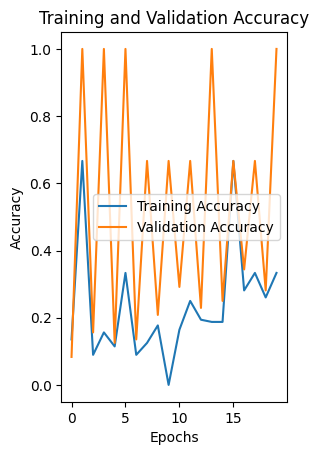

In [32]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

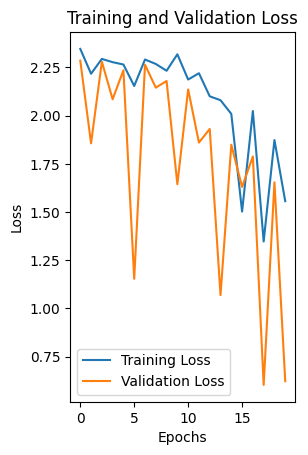

In [33]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [34]:
# Show the plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>